In [62]:
import os, sys
import subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import matplotlib.pyplot as plt

In [63]:
year = '2018'
ddbthr=0.64

In [64]:
with open('xsec.json') as f:
    xs = json.load(f)
        
with open('pmap.json') as f:
    pmap = json.load(f)

with open('lumi.json') as f:
    lumis = json.load(f)

In [65]:
indir = "outfiles/"
infiles = subprocess.getoutput("ls "+indir+year+"_dask_QCD.coffea").split()
outsum = processor.dict_accumulator()

In [66]:
started = 0
for filename in infiles:

    print("Loading "+filename)

    if os.path.isfile(filename):
        out = util.load(filename)

        if started == 0:
            outsum['templates'] = out['templates']
            outsum['sumw'] = out['sumw']
            started += 1
        else:
            outsum['templates'].add(out['templates'])
            outsum['sumw'].add(out['sumw'])

        del out

scale_lumi = {k: xs[k] * 1000 * lumis[year] / w for k, w in outsum['sumw'].items()} 

outsum['templates'].scale(scale_lumi, 'dataset')
templates = outsum['templates'].integrate('systematic','nominal')

Loading outfiles/2018_dask_QCD.coffea


In [67]:
colors = ['violet','red','orange','gold','lime','green','deepskyblue','blue','black','gray']
datasets = ['QCD_Pt_170to300','QCD_Pt_300to470','QCD_Pt_470to600','QCD_Pt_600to800','QCD_Pt_800to1000','QCD_Pt_1000to1400','QCD_Pt_1400to1800','QCD_Pt_1800to2400','QCD_Pt_2400to3200','QCD_Pt_3200toInf']

In [68]:
passhists = []
failhists = []
histnames = ['VBF mjj1','VBF mjj2','ggF pt1','ggF pt2','ggF pt3','ggF pt4','ggF pt5','ggF pt6']

mjjbins = [1000,2000,13000]
vbf = templates.integrate('region','signal-vbf')

for i,b in enumerate(mjjbins[:-1]):

    passhists += [vbf.sum('pt1','genflavor').integrate('mjj',int_range=slice(mjjbins[i],mjjbins[i+1])).integrate('ddb1',int_range=slice(ddbthr,1))]
    failhists += [vbf.sum('pt1','genflavor').integrate('mjj',int_range=slice(mjjbins[i],mjjbins[i+1])).integrate('ddb1',int_range=slice(0,ddbthr))]
    
ptbins = [450, 500, 550, 600, 675, 800, 1200]
ggf = templates.integrate('region','signal-ggf').integrate('mjj',overflow='allnan')

for i,b in enumerate(ptbins[:-1]):

    passhists += [ggf.integrate('pt1',int_range=slice(ptbins[i],ptbins[i+1])).sum('genflavor').integrate('ddb1',int_range=slice(ddbthr,1))]
    failhists += [ggf.integrate('pt1',int_range=slice(ptbins[i],ptbins[i+1])).sum('genflavor').integrate('ddb1',int_range=slice(0,ddbthr))]

/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/tmp/ipykernel_929/2067997241.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(year+'/qcd-slices.pdf',bbox_to_inches='tight')
/tmp/ipykernel_929/2067997241.py:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(year+'/qcd-slices.png',bbox_to_inches='tight')


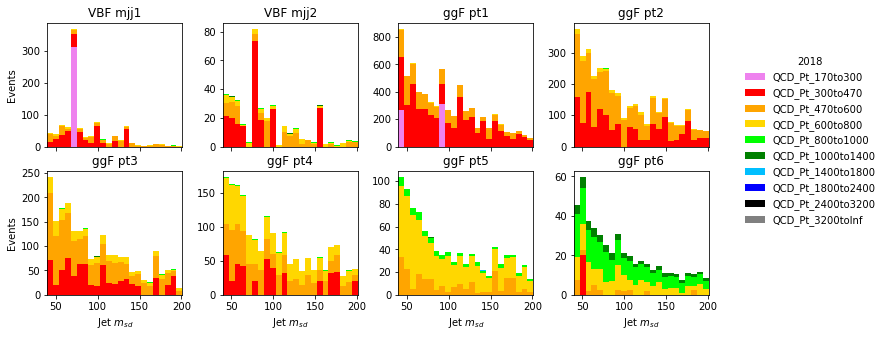

In [69]:
def grid():
    
    fig, ax = plt.subplots(2,5,sharex=True,figsize=(15,5))
    plt.subplots_adjust(wspace=0.3)


    hist.plot1d(passhists[0],stack=True,ax=ax[0][0],order=datasets,fill_opts={'color':colors})
    ax[0][0].get_legend().remove()
    ax[0][0].set_xlabel('')
    ax[0][0].set_title(histnames[0])
    hist.plot1d(passhists[1],stack=True,ax=ax[0][1],order=datasets,fill_opts={'color':colors})
    ax[0][1].get_legend().remove()
    ax[0][1].set_ylabel('')
    ax[0][1].set_xlabel('')
    ax[0][1].set_title(histnames[1])
    hist.plot1d(passhists[2],stack=True,ax=ax[0][2],order=datasets,fill_opts={'color':colors})
    ax[0][2].get_legend().remove()
    ax[0][2].set_ylabel('')
    ax[0][2].set_xlabel('')
    ax[0][2].set_title(histnames[2])
    hist.plot1d(passhists[3],stack=True,ax=ax[0][3],order=datasets,fill_opts={'color':colors})
    ax[0][3].get_legend().remove()
    ax[0][3].set_ylabel('')
    ax[0][3].set_xlabel('')
    ax[0][3].set_title(histnames[3])
    ax[0][4].axis('off')
    hist.plot1d(passhists[4],stack=True,ax=ax[1][0],order=datasets,fill_opts={'color':colors})
    ax[1][0].get_legend().remove()
    ax[1][0].set_title(histnames[4])
    hist.plot1d(passhists[5],stack=True,ax=ax[1][1],order=datasets,fill_opts={'color':colors})
    ax[1][1].get_legend().remove()
    ax[1][1].set_ylabel('')
    ax[1][1].set_title(histnames[5])
    hist.plot1d(passhists[6],stack=True,ax=ax[1][2],order=datasets,fill_opts={'color':colors})
    ax[1][2].get_legend().remove()
    ax[1][2].set_ylabel('')
    ax[1][2].set_title(histnames[6])
    hist.plot1d(passhists[7],stack=True,ax=ax[1][3],order=datasets,fill_opts={'color':colors})
    ax[1][3].set_ylabel('')
    ax[1][3].set_title(histnames[7])
    ax[1][4].axis('off')
    ax[1][3].legend(bbox_to_anchor=(1.2,2),frameon=False,title=year)
    #plt.suptitle(histnames[i]+' DDB pass')
    #plt.show()
    
    plt.savefig(year+'/qcd-slices.pdf',bbox_to_inches='tight')
    plt.savefig(year+'/qcd-slices.png',bbox_to_inches='tight')
    
grid()